In [1]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula2.1/movies.csv"
filmes = pd.read_csv(uri) #data_frame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index('filmeId')
filmes = filmes.join(filmes['generos'].str.get_dummies()).drop('generos', axis = 1)
filmes['ano'] = filmes['titulo'].str.extract(r'.*\((\d+)\)')
filmes = filmes.dropna()

filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula2.1/ratings.csv"
notas = pd.read_csv(uri)
notas.columns = ["userId", "filmeId", "nota", "momento"]
arredondadas = notas['nota'].round(1)

notas.head()

,userId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
medias = notas.groupby('filmeId')['nota'].mean()
filmes = filmes.join(medias).dropna().sort_values('nota', ascending=False).rename(columns={'nota' : 'media'})

total = notas.groupby('filmeId')['momento'].count()
filmes = filmes.join(total)
filmes = filmes.rename(columns = {'momento' : 'total'})
filmes = filmes.query("total > 50")
filmes['media_categoria'] = (filmes['media']).round(1).values

random_filmes = filmes.sample(10)
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1994,4.429022,317,4.4
858,"Godfather, The (1972)",0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1972,4.289062,192,4.3
2959,Fight Club (1999),0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1999,4.272936,218,4.3
1276,Cool Hand Luke (1967),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1967,4.271930,57,4.3
750,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1964,4.268041,97,4.3


In [4]:
notas.describe()

,userId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<AxesSubplot:>

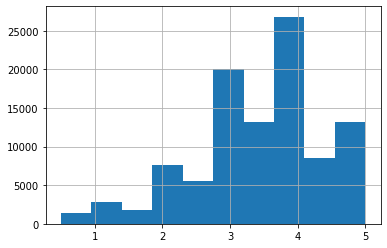

In [5]:
notas['nota'].hist()

In [6]:
arredondadas.sample(5)

9139     3.5
831      3.0
88645    3.0
94177    2.5
22085    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='nota'>

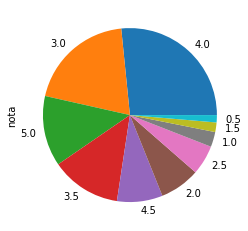

In [7]:
arredondadas.value_counts().plot.pie()

In [8]:
import seaborn as sns

/home/pauwlo/Documentos/ambientepy/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


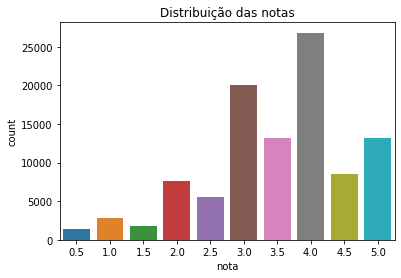

In [9]:
import matplotlib.pyplot as plt

sns.countplot(arredondadas)
plt.title("Distribuição das notas");

/home/pauwlo/Documentos/ambientepy/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota', ylabel='count'>

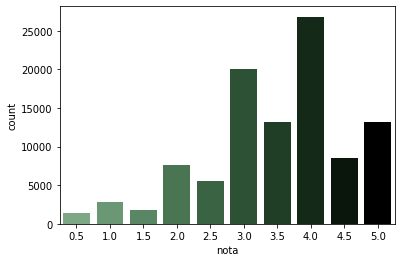

In [10]:
palette = sns.color_palette("Blues", 10)
palette = sns.cubehelix_palette(10,start=2, rot=0, dark=0, light=.6)

sns.countplot(arredondadas, palette = palette)

/home/pauwlo/Documentos/ambientepy/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media', ylabel='Density'>

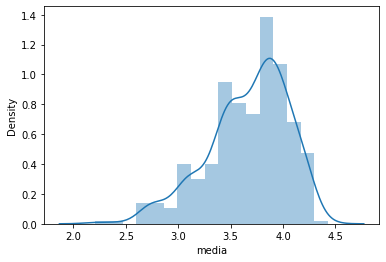

In [11]:
sns.distplot(filmes['media'])

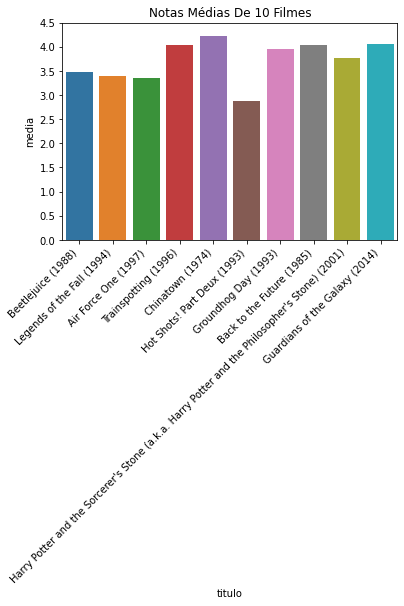

In [12]:
p = sns.barplot(data = random_filmes, x ="titulo", y = "media")
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title("Notas Médias De 10 Filmes")
plt.ylim(0,4.5)
plt.show()

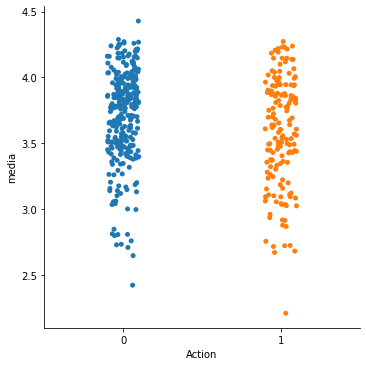

In [13]:
sns.catplot( data = filmes, x = "Action", y = "media")

/home/pauwlo/Documentos/ambientepy/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pauwlo/Documentos/ambientepy/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


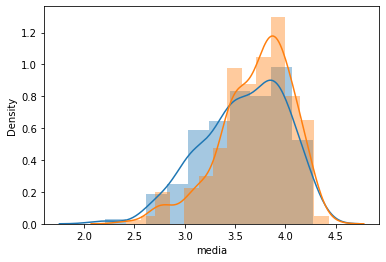

In [14]:
sns.distplot(filmes.query("Action == 1")['media'])
sns.distplot(filmes.query("Action == 0")['media'])
plt.show()

In [15]:
ids_aleatorios = ",".join(random_filmes.index.values.astype(str))
query = f"filmeId in ({ids_aleatorios})"
query

'filmeId in (2174,266,1608,778,1252,466,1265,1270,4896,112852)'

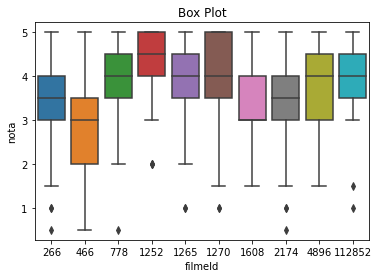

In [16]:
sns.boxplot(data = notas.query(query), x = "filmeId", y = "nota")
plt.title("Box Plot")
plt.show()

In [ ]:
## total_categoria = len(filmes['media_categoria'].unique())
sns.catplot(data = filmes, x = "ano", y = "media", palette = sns.color_palette("Blues", 6), hue = "media_categoria")
plt.show()